# Comparing Gradient Adjusted

In [1]:
import os
import numpy as np

In [85]:
data_path=r'C:\Users\Fabrice\Documents\GitHub\ppl_gnn_stocks2\correlations\NASDAQ'
save_path='data/relation/correlations_trained/NASDAQ'

In [96]:
orig = np.load(data_path + '/NASDAQ_correlation_init_100.npy')
orig.shape

(1026, 1026)

In [97]:
pert = np.squeeze(np.load(save_path + '/NASDAQ_correlation_init_100.npy'))
pert.shape

(1026, 1026)

In [98]:
orig.reshape(-1)

array([1.        , 0.33666316, 0.28808382, ..., 0.24121553, 0.10600144,
       1.        ], dtype=float32)

In [99]:
pert.reshape(-1)

array([1.        , 0.33666316, 0.28808382, ..., 0.24121538, 0.10600134,
       1.        ], dtype=float32)

In [104]:
np.sum(np.abs(orig.reshape(-1) - pert.reshape(-1)))

0.18615265

In [105]:
np.sum(orig.reshape(-1) - pert.reshape(-1))

-0.014009924

In [90]:
np.all(orig == pert)

False

In [106]:
import math

In [110]:
num_timesteps = 1215
train_size = 200
val_size = 20
test_size = 20
num_windows = math.floor(num_timesteps / (train_size + val_size + test_size))

In [111]:
num_windows

5

In [11]:
import torch

In [15]:
num_timesteps = 114
num_companies = 1026
gt = np.arange(num_timesteps * num_companies).reshape((num_timesteps, num_companies))
idx = np.arange(num_timesteps)

gt = torch.from_numpy(gt).long()
idx = torch.from_numpy(idx).long()

In [19]:
gt[(idx, idx)]

tensor([     0,   1027,   2054,   3081,   4108,   5135,   6162,   7189,   8216,
          9243,  10270,  11297,  12324,  13351,  14378,  15405,  16432,  17459,
         18486,  19513,  20540,  21567,  22594,  23621,  24648,  25675,  26702,
         27729,  28756,  29783,  30810,  31837,  32864,  33891,  34918,  35945,
         36972,  37999,  39026,  40053,  41080,  42107,  43134,  44161,  45188,
         46215,  47242,  48269,  49296,  50323,  51350,  52377,  53404,  54431,
         55458,  56485,  57512,  58539,  59566,  60593,  61620,  62647,  63674,
         64701,  65728,  66755,  67782,  68809,  69836,  70863,  71890,  72917,
         73944,  74971,  75998,  77025,  78052,  79079,  80106,  81133,  82160,
         83187,  84214,  85241,  86268,  87295,  88322,  89349,  90376,  91403,
         92430,  93457,  94484,  95511,  96538,  97565,  98592,  99619, 100646,
        101673, 102700, 103727, 104754, 105781, 106808, 107835, 108862, 109889,
        110916, 111943, 112970, 113997, 

In [17]:
gt[:, idx].shape

torch.Size([114, 114])

# Plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set("paper", rc={"font.size":20,
                     "axes.titlesize":25,
                     "axes.labelsize":20,
                     "lines.linewidth":2,
                     "lines.markersize":5,
                     "xtick.labelsize":14,
                     "ytick.labelsize":14}) 

sns.set_palette(sns.cubehelix_palette(10, start=.5, rot=-.75))

# NASDAQ

## NASDAQ | Correlation | Untrained

In [2]:
MSE = [0.0021755427587777376,
       0.0028203800320625305,
       0.0013906618114560843,
       0.0021709662396460770,
       0.0005875862552784383,
       0.0005947968456894159,
       0.0016774552641436458]

earned_return = [72.23446655273438, 
                 27.954967498779297,
                 35.39738464355469,
                 79.31461334228516,
                 110.76797485351562,
                 114.49156951904297,
                 440.16107177734375]
best_return = [278.4093017578125,
               257.5941162109375,
               217.72177124023438,
               261.263427734375,
               302.0916748046875,
               235.29896545410156,
               1552.3790283203125]
mean_return = [-0.08708011358976364,
               -0.488301545381546,
               -0.44632336497306824,
               0.21958322823047638,
               0.5476897358894348,
               -0.18249842524528503,
               -0.08708013594150543]

rows    = ['MSE', 'earned_return', 'best_return', 'mean_return']
columns = ['1', '2', '3', '4', '5', '6', 'all']
results = [MSE, earned_return, best_return, mean_return]

df = pd.DataFrame(results, index=rows, columns = columns).T
df['percent_of_best'] = df['earned_return'] / df['best_return']
df['market'] = 'NASDAQ'
df['relation'] = 'corr_untrained'
df_corr_ut = df
df_corr_ut

,MSE,earned_return,best_return,mean_return,percent_of_best,market,relation
1,0.002176,72.234467,278.409302,-0.087080,0.259454,NASDAQ,corr_untrained
2,0.002820,27.954967,257.594116,-0.488302,0.108523,NASDAQ,corr_untrained
3,0.001391,35.397385,217.721771,-0.446323,0.162581,NASDAQ,corr_untrained
4,0.002171,79.314613,261.263428,0.219583,0.303581,NASDAQ,corr_untrained
5,0.000588,110.767975,302.091675,0.547690,0.366670,NASDAQ,corr_untrained
6,0.000595,114.491570,235.298965,-0.182498,0.486579,NASDAQ,corr_untrained
all,0.001677,440.161072,1552.379028,-0.087080,0.283540,NASDAQ,corr_untrained


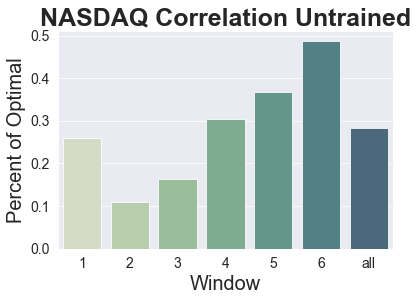

In [3]:
sns.barplot(x=df.index, y='percent_of_best', data=df_corr_ut)
plt.xlabel('Window')
plt.ylabel('Percent of Optimal')
plt.title(label='NASDAQ Correlation Untrained', weight='bold')
# plt.savefig('imgs/order_permutation/order_permutation_rs_e100_'+model_type+'.png')
plt.show()

## NASDAQ | Correlation | Trained

In [4]:
MSE = [0.0006828527548350394,
       0.0004294727696105838,
       0.0010088412091135979,
       0.000740301504265517,
       0.0019141144584864378,
       0.004013185855001211,
       0.0013306691544130445]

earned_return = [63.59785842895508, 
                 58.509456634521484,
                 35.58065414428711,
                 102.43278503417969,
                 115.70148468017578,
                 125.85831451416016,
                 501.68060302734375]
best_return = [278.4093017578125,
               257.5941162109375,
               217.72177124023438,
               261.263427734375,
               302.0916748046875,
               235.29896545410156,
               1552.3790283203125]
mean_return = [-0.08708011358976364,
               -0.488301545381546,
               -0.44632336497306824,
               0.21958322823047638,
               0.5476897358894348,
               -0.18249842524528503,
               -0.08708013594150543]

rows    = ['MSE', 'earned_return', 'best_return', 'mean_return']
columns = ['1', '2', '3', '4', '5', '6', 'all']
results = [MSE, earned_return, best_return, mean_return]

df = pd.DataFrame(results, index=rows, columns = columns).T
df['percent_of_best'] = df['earned_return'] / df['best_return']
df['market'] = 'NASDAQ'
df['relation'] = 'corr_trained'
df_corr_t = df
df_corr_t

,MSE,earned_return,best_return,mean_return,percent_of_best,market,relation
1,0.000683,63.597858,278.409302,-0.087080,0.228433,NASDAQ,corr_trained
2,0.000429,58.509457,257.594116,-0.488302,0.227138,NASDAQ,corr_trained
3,0.001009,35.580654,217.721771,-0.446323,0.163423,NASDAQ,corr_trained
4,0.000740,102.432785,261.263428,0.219583,0.392067,NASDAQ,corr_trained
5,0.001914,115.701485,302.091675,0.547690,0.383001,NASDAQ,corr_trained
6,0.004013,125.858315,235.298965,-0.182498,0.534887,NASDAQ,corr_trained
all,0.001331,501.680603,1552.379028,-0.087080,0.323169,NASDAQ,corr_trained


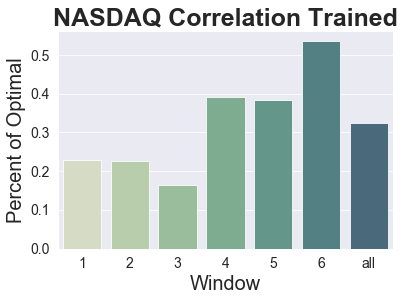

In [5]:
sns.barplot(x=df.index, y='percent_of_best', data=df_corr_t)
plt.xlabel('Window')
plt.ylabel('Percent of Optimal')
plt.title(label='NASDAQ Correlation Trained', weight='bold')
# plt.savefig('imgs/order_permutation/order_permutation_rs_e100_'+model_type+'.png')
plt.show()

## NASDAQ | Wikidata

In [6]:
MSE = [0.0005301909986883402,
       0.0003553458664100617,
       0.00061417295364663,
       0.000563659006729722,
       0.00046444314648397267,
       0.00042214899440295994,
       0.0004953186144120991]

earned_return = [103.70750427246094, 
                 55.07350158691406,
                 39.070457458496094,
                 89.86134338378906,
                 148.70269775390625,
                 160.7231903076172,
                 597.1387939453125]
best_return = [278.4093017578125,
               257.5941162109375,
               217.72177124023438,
               261.263427734375,
               302.0916748046875,
               235.29896545410156,
               1552.3790283203125]
mean_return = [-0.08708011358976364,
               -0.488301545381546,
               -0.44632336497306824,
               0.21958322823047638,
               0.5476897358894348,
               -0.18249842524528503,
               -0.08708013594150543]

rows    = ['MSE', 'earned_return', 'best_return', 'mean_return']
columns = ['1', '2', '3', '4', '5', '6', 'all']
results = [MSE, earned_return, best_return, mean_return]

df = pd.DataFrame(results, index=rows, columns = columns).T
df['percent_of_best'] = df['earned_return'] / df['best_return']
df['market'] = 'NASDAQ'
df['relation'] = 'wikidata'
df_wd = df
df_wd

,MSE,earned_return,best_return,mean_return,percent_of_best,market,relation
1,0.000530,103.707504,278.409302,-0.087080,0.372500,NASDAQ,wikidata
2,0.000355,55.073502,257.594116,-0.488302,0.213800,NASDAQ,wikidata
3,0.000614,39.070457,217.721771,-0.446323,0.179451,NASDAQ,wikidata
4,0.000564,89.861343,261.263428,0.219583,0.343949,NASDAQ,wikidata
5,0.000464,148.702698,302.091675,0.547690,0.492244,NASDAQ,wikidata
6,0.000422,160.723190,235.298965,-0.182498,0.683059,NASDAQ,wikidata
all,0.000495,597.138794,1552.379028,-0.087080,0.384660,NASDAQ,wikidata


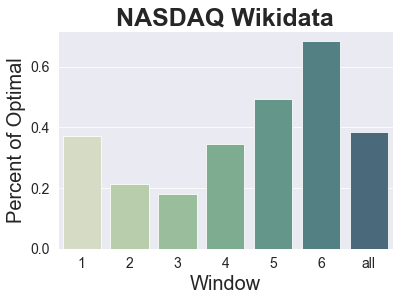

In [7]:
sns.barplot(x=df.index, y='percent_of_best', data=df_wd)
plt.xlabel('Window')
plt.ylabel('Percent of Optimal')
plt.title(label='NASDAQ Wikidata', weight='bold')
# plt.savefig('imgs/order_permutation/order_permutation_rs_e100_'+model_type+'.png')
plt.show()

## NASDAQ | Sector Industry

In [8]:
MSE = [0.0005148673662915826,
       0.00031270619365386665,
       0.0005496738594956696,
       0.0005221812170930207,
       0.0004359505546744913,
       0.00039582911995239556,
       0.00045832624891772866]

earned_return = [120.00935363769531, 
                 73.8315658569336,
                 53.04846954345703,
                 96.56816101074219,
                 151.92306518554688,
                 158.55714416503906,
                 653.9379272460938]
best_return = [278.4093017578125,
               257.5941162109375,
               217.72177124023438,
               261.263427734375,
               302.0916748046875,
               235.29896545410156,
               1552.3790283203125]
mean_return = [-0.08708011358976364,
               -0.488301545381546,
               -0.44632336497306824,
               0.21958322823047638,
               0.5476897358894348,
               -0.18249842524528503,
               -0.08708013594150543]

rows    = ['MSE', 'earned_return', 'best_return', 'mean_return']
columns = ['1', '2', '3', '4', '5', '6', 'all']
results = [MSE, earned_return, best_return, mean_return]

df = pd.DataFrame(results, index=rows, columns = columns).T
df['percent_of_best'] = df['earned_return'] / df['best_return']
df['market'] = 'NASDAQ'
df['relation'] = 'sector_industry'
df_si = df
df_si

,MSE,earned_return,best_return,mean_return,percent_of_best,market,relation
1,0.000515,120.009354,278.409302,-0.087080,0.431054,NASDAQ,sector_industry
2,0.000313,73.831566,257.594116,-0.488302,0.286620,NASDAQ,sector_industry
3,0.000550,53.048470,217.721771,-0.446323,0.243653,NASDAQ,sector_industry
4,0.000522,96.568161,261.263428,0.219583,0.369620,NASDAQ,sector_industry
5,0.000436,151.923065,302.091675,0.547690,0.502904,NASDAQ,sector_industry
6,0.000396,158.557144,235.298965,-0.182498,0.673854,NASDAQ,sector_industry
all,0.000458,653.937927,1552.379028,-0.087080,0.421249,NASDAQ,sector_industry


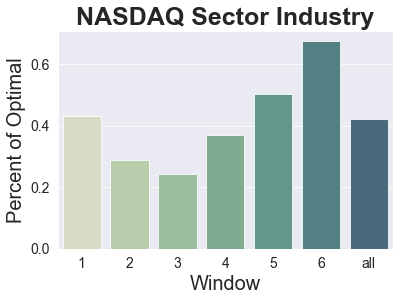

In [9]:
sns.barplot(x=df.index, y='percent_of_best', data=df_si)
plt.xlabel('Window')
plt.ylabel('Percent of Optimal')
plt.title(label='NASDAQ Sector Industry', weight='bold')
# plt.savefig('imgs/order_permutation/order_permutation_rs_e100_'+model_type+'.png')
plt.show()

In [10]:
df_nasdaq = pd.concat([df_corr_ut,df_corr_t,df_wd,df_si])
df_nasdaq

,MSE,earned_return,best_return,mean_return,percent_of_best,market,relation
1,0.002176,72.234467,278.409302,-0.087080,0.259454,NASDAQ,corr_untrained
2,0.002820,27.954967,257.594116,-0.488302,0.108523,NASDAQ,corr_untrained
3,0.001391,35.397385,217.721771,-0.446323,0.162581,NASDAQ,corr_untrained
4,0.002171,79.314613,261.263428,0.219583,0.303581,NASDAQ,corr_untrained
5,0.000588,110.767975,302.091675,0.547690,0.366670,NASDAQ,corr_untrained
6,0.000595,114.491570,235.298965,-0.182498,0.486579,NASDAQ,corr_untrained
all,0.001677,440.161072,1552.379028,-0.087080,0.283540,NASDAQ,corr_untrained
1,0.000683,63.597858,278.409302,-0.087080,0.228433,NASDAQ,corr_trained
2,0.000429,58.509457,257.594116,-0.488302,0.227138,NASDAQ,corr_trained
3,0.001009,35.580654,217.721771,-0.446323,0.163423,NASDAQ,corr_trained


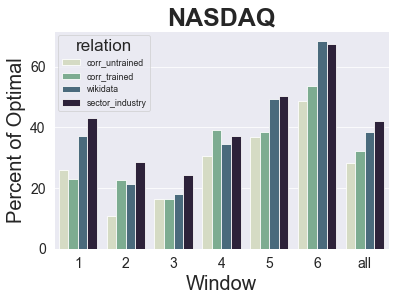

In [11]:
sns.set_palette(sns.cubehelix_palette(4, start=.5, rot=-.75))

sns.barplot(x=df_nasdaq.index, y=df_nasdaq['percent_of_best']*100, data=df_nasdaq, hue='relation')
plt.xlabel('Window')
plt.ylabel('Percent of Optimal')
plt.title(label='NASDAQ', weight='bold')
# plt.savefig('imgs/order_permutation/order_permutation_rs_e100_'+model_type+'.png')
plt.show()

# NYSE

In [12]:
sns.set_palette(sns.cubehelix_palette(7, start=.5, rot=-.75))

## NYSE | Correlations Trained

In [13]:
MSE = [7.02833931427449e-05,
       5.6100172514561564e-05,
       0.00010734124953160062,
       0.00022691719641443342,
       0.00012690215953625739,
       0.00010656140511855483,
       0.0001161644104286097]

earned_return = [238.48956298828125, 
                 172.59217834472656,
                 204.36572265625,
                 84.0820541381836,
                 129.93350219726562,
                 326.74884033203125,
                 1156.2119140625]
best_return = [280.24932861328125,
               191.30825805664062,
               325.7592468261719,
               235.53732299804688,
               275.487060546875,
               359.0582275390625,
               1667.3995361328125]
mean_return = [-0.3624827265739441,
               -0.029715141281485558,
               -0.4175759255886078,
               0.007674853783100843,
               0.7572153806686401,
               -0.03162967786192894,
               -0.36248284578323364]

rows    = ['MSE', 'earned_return', 'best_return', 'mean_return']
columns = ['1', '2', '3', '4', '5', '6', 'all']
results = [MSE, earned_return, best_return, mean_return]

df = pd.DataFrame(results, index=rows, columns = columns).T
df['percent_of_best'] = df['earned_return'] / df['best_return']
df['market'] = 'NYSE'
df['relation'] = 'corr_trained'
df_corr_nyse = df
df_corr_nyse

,MSE,earned_return,best_return,mean_return,percent_of_best,market,relation
1,0.000070,238.489563,280.249329,-0.362483,0.850991,NYSE,corr_trained
2,0.000056,172.592178,191.308258,-0.029715,0.902168,NYSE,corr_trained
3,0.000107,204.365723,325.759247,-0.417576,0.627352,NYSE,corr_trained
4,0.000227,84.082054,235.537323,0.007675,0.356980,NYSE,corr_trained
5,0.000127,129.933502,275.487061,0.757215,0.471650,NYSE,corr_trained
6,0.000107,326.748840,359.058228,-0.031630,0.910016,NYSE,corr_trained
all,0.000116,1156.211914,1667.399536,-0.362483,0.693422,NYSE,corr_trained


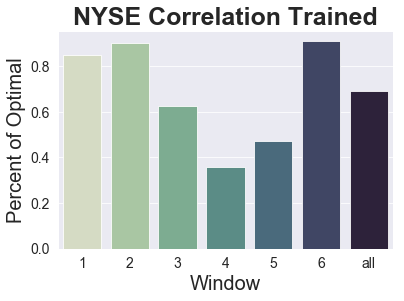

In [14]:
sns.barplot(x=df_corr_nyse.index, y='percent_of_best', data=df_corr_nyse)
plt.xlabel('Window')
plt.ylabel('Percent of Optimal')
plt.title(label='NYSE Correlation Trained', weight='bold')
# plt.savefig('imgs/order_permutation/order_permutation_rs_e100_'+model_type+'.png')
plt.show()

## NYSE | Wikidata

In [15]:
MSE = [5.699355460819788e-05,
       4.410601104609668e-05,
       9.022891754284501e-05,
       0.00013171895989216864,
       0.00011130166967632249,
       8.820340008242056e-05,
       8.703359344508499e-05]

earned_return = [267.69146728515625, 
                 179.81129455566406,
                 219.49603271484375,
                 135.80284118652344,
                 149.8310546875,
                 341.16455078125,
                 1293.79736328125]
best_return = [280.24932861328125,
               191.30825805664062,
               325.7592468261719,
               235.53732299804688,
               275.487060546875,
               359.0582275390625,
               1667.3995361328125]
mean_return = [-0.3624827265739441,
               -0.029715141281485558,
               -0.4175759255886078,
               0.007674853783100843,
               0.7572153806686401,
               -0.03162967786192894,
               -0.36248284578323364]

rows    = ['MSE', 'earned_return', 'best_return', 'mean_return']
columns = ['1', '2', '3', '4', '5', '6', 'all']
results = [MSE, earned_return, best_return, mean_return]

df = pd.DataFrame(results, index=rows, columns = columns).T
df['percent_of_best'] = df['earned_return'] / df['best_return']
df['market'] = 'NYSE'
df['relation'] = 'wikidata'
df_wd_nyse = df
df_wd_nyse

,MSE,earned_return,best_return,mean_return,percent_of_best,market,relation
1,0.000057,267.691467,280.249329,-0.362483,0.955190,NYSE,wikidata
2,0.000044,179.811295,191.308258,-0.029715,0.939903,NYSE,wikidata
3,0.000090,219.496033,325.759247,-0.417576,0.673798,NYSE,wikidata
4,0.000132,135.802841,235.537323,0.007675,0.576566,NYSE,wikidata
5,0.000111,149.831055,275.487061,0.757215,0.543877,NYSE,wikidata
6,0.000088,341.164551,359.058228,-0.031630,0.950165,NYSE,wikidata
all,0.000087,1293.797363,1667.399536,-0.362483,0.775937,NYSE,wikidata


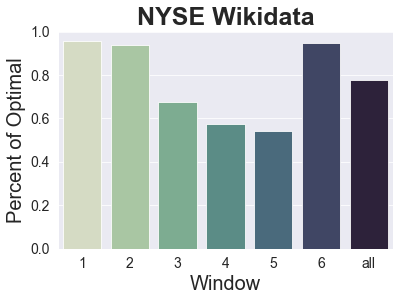

In [16]:
sns.barplot(x=df_wd_nyse.index, y='percent_of_best', data=df_wd_nyse)
plt.xlabel('Window')
plt.ylabel('Percent of Optimal')
plt.title(label='NYSE Wikidata', weight='bold')
# plt.savefig('imgs/order_permutation/order_permutation_rs_e100_'+model_type+'.png')
plt.show()

## NYSE | Sector Industry

In [17]:
MSE = [5.582932863035239e-05,
       4.5088741899235174e-05,
       8.986781176645309e-05,
       0.000123675970826298,
       0.0001052634252118878,
       8.796025940682739e-05,
       8.443813567282632e-05]

earned_return = [266.0310363769531, 
                 172.0792694091797,
                 233.98196411132812,
                 136.38589477539062,
                 113.96105194091797,
                 329.79248046875,
                 1252.231689453125]
best_return = [280.24932861328125,
               191.30825805664062,
               325.7592468261719,
               235.53732299804688,
               275.487060546875,
               359.0582275390625,
               1667.3995361328125]
mean_return = [-0.3624827265739441,
               -0.029715141281485558,
               -0.4175759255886078,
               0.007674853783100843,
               0.7572153806686401,
               -0.03162967786192894,
               -0.36248284578323364]

rows    = ['MSE', 'earned_return', 'best_return', 'mean_return']
columns = ['1', '2', '3', '4', '5', '6', 'all']
results = [MSE, earned_return, best_return, mean_return]

df = pd.DataFrame(results, index=rows, columns = columns).T
df['percent_of_best'] = df['earned_return'] / df['best_return']
df['market'] = 'NYSE'
df['relation'] = 'sector_industry'
df_si_nyse = df
df_si_nyse

,MSE,earned_return,best_return,mean_return,percent_of_best,market,relation
1,0.000056,266.031036,280.249329,-0.362483,0.949266,NYSE,sector_industry
2,0.000045,172.079269,191.308258,-0.029715,0.899487,NYSE,sector_industry
3,0.000090,233.981964,325.759247,-0.417576,0.718267,NYSE,sector_industry
4,0.000124,136.385895,235.537323,0.007675,0.579042,NYSE,sector_industry
5,0.000105,113.961052,275.487061,0.757215,0.413671,NYSE,sector_industry
6,0.000088,329.792480,359.058228,-0.031630,0.918493,NYSE,sector_industry
all,0.000084,1252.231689,1667.399536,-0.362483,0.751009,NYSE,sector_industry


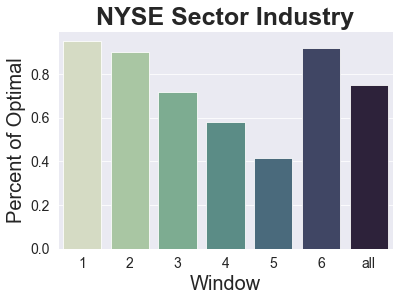

In [18]:
sns.barplot(x=df_si_nyse.index, y='percent_of_best', data=df_si_nyse)
plt.xlabel('Window')
plt.ylabel('Percent of Optimal')
plt.title(label='NYSE Sector Industry', weight='bold')
# plt.savefig('imgs/order_permutation/order_permutation_rs_e100_'+model_type+'.png')
plt.show()

In [19]:
df_nyse = pd.concat([df_corr_nyse,df_wd_nyse,df_si_nyse])
df_nyse

,MSE,earned_return,best_return,mean_return,percent_of_best,market,relation
1,0.000070,238.489563,280.249329,-0.362483,0.850991,NYSE,corr_trained
2,0.000056,172.592178,191.308258,-0.029715,0.902168,NYSE,corr_trained
3,0.000107,204.365723,325.759247,-0.417576,0.627352,NYSE,corr_trained
4,0.000227,84.082054,235.537323,0.007675,0.356980,NYSE,corr_trained
5,0.000127,129.933502,275.487061,0.757215,0.471650,NYSE,corr_trained
6,0.000107,326.748840,359.058228,-0.031630,0.910016,NYSE,corr_trained
all,0.000116,1156.211914,1667.399536,-0.362483,0.693422,NYSE,corr_trained
1,0.000057,267.691467,280.249329,-0.362483,0.955190,NYSE,wikidata
2,0.000044,179.811295,191.308258,-0.029715,0.939903,NYSE,wikidata
3,0.000090,219.496033,325.759247,-0.417576,0.673798,NYSE,wikidata


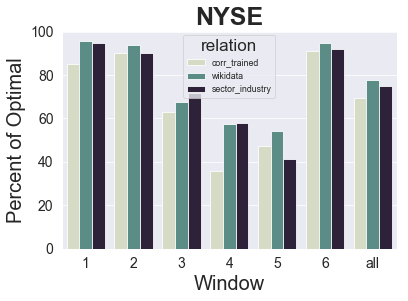

In [20]:
sns.set_palette(sns.cubehelix_palette(3, start=.5, rot=-.75))

sns.barplot(x=df_nyse.index, y=df_nyse['percent_of_best']*100, data=df_nyse, hue='relation')
plt.xlabel('Window')
plt.ylabel('Percent of Optimal')
plt.title(label='NYSE', weight='bold')
# plt.savefig('imgs/order_permutation/order_permutation_rs_e100_'+model_type+'.png')
plt.show()

# Closeness of Trained Correlations with Wikidata & Sector Industry

In [1]:
import numpy as np
import os

In [2]:
wikidata_dir = r'C:\Users\Fabrice\Documents\GitHub\ppl_gnn_stocks\data\relation\wikidata'
sector_industry_dir = r'C:\Users\Fabrice\Documents\GitHub\ppl_gnn_stocks\data\relation\sector_industry'
corr_dir = r'C:\Users\Fabrice\Documents\GitHub\ppl_gnn_stocks\data\relation\correlations_trained'

In [3]:
NASDAQ_wd_path = wikidata_dir + r'\NASDAQ_wiki_relation.npy'
NASDAQ_si_path = sector_industry_dir + r'\NASDAQ_industry_relation.npy'
NASDAQ_corr_path = corr_dir + r'\NASDAQ'

NYSE_wd_path = wikidata_dir + r'\NYSE_wiki_relation.npy'
NYSE_si_path = sector_industry_dir + r'\NYSE_industry_relation.npy'
NYSE_corr_path = corr_dir + r'\NYSE'

In [ ]:
corrs = []
for t in range(1215):
    file_name = 'NASDAQ_correlation_init_' + str(t) + '.npy'
    load_path = os.path.join(NASDAQ_corr_path, file_name)
    corr_t = np.expand_dims(np.squeeze(np.load(load_path)),-1)
    corrs.append(corr_t)
    
NASDAQ_corrs = np.average(np.concatenate(corrs, axis=-1), axis=-1)
print(NASDAQ_corrs.shape)

In [4]:
corrs = []
for t in range(1215):
    file_name = 'NYSE_correlation_init_' + str(t) + '.npy'
    load_path = os.path.join(NYSE_corr_path, file_name)
    corr_t = np.expand_dims(np.squeeze(np.load(load_path)),-1)
    corrs.append(corr_t)
    
NYSE_corrs = np.concatenate(corrs, axis=-1)
NYSE_corrs = np.average(NYSE_corrs, axis=-1)
print(NYSE_corrs.shape)

(1737, 1737)


In [5]:
NASDAQ_wd = np.load(NASDAQ_wd_path)
NASDAQ_si = np.load(NASDAQ_si_path)
NYSE_wd = np.load(NYSE_wd_path)
NYSE_si = np.load(NYSE_si_path)

In [6]:
NASDAQ_wd_avg = np.average(NASDAQ_wd, axis=-1)
NASDAQ_si_avg = np.average(NASDAQ_si, axis=-1)
NYSE_wd_avg = np.average(NYSE_wd, axis=-1)
NYSE_si_avg = np.average(NYSE_si, axis=-1)

In [10]:
# NASDAQ
diff_wd_si_NASDAQ = NASDAQ_wd_avg - NASDAQ_si_avg
norm_wd_si_NASDAQ = np.linalg.norm(diff_wd_si_NASDAQ, ord='fro')
print('norm_wd_si_NASDAQ \t', norm_wd_si_NASDAQ)

diff_corrs_wd_NASDAQ = NASDAQ_corrs - NASDAQ_wd_avg
norm_corrs_wd_NASDAQ = np.linalg.norm(diff_corrs_wd_NASDAQ, ord='fro')
print('norm_corrs_wd_NASDAQ \t', norm_corrs_wd_NASDAQ)

diff_corrs_si_NASDAQ = NASDAQ_corrs - NASDAQ_si_avg
norm_corrs_si_NASDAQ = np.linalg.norm(diff_corrs_si_NASDAQ, ord='fro')
print('norm_corrs_si_NASDAQ \t', norm_corrs_si_NASDAQ)

norm_wd_si_NASDAQ 	 2.6194473938078473
norm_corrs_si_NASDAQ 	 239.8446595705886
norm_corrs_si_NASDAQ 	 239.15598319443671


In [7]:
# NYSE
diff_wd_si_NYSE = NYSE_wd_avg - NYSE_si_avg
norm_wd_si_NYSE = np.linalg.norm(diff_wd_si_NYSE, ord='fro')
print('norm_wd_si_NYSE \t', norm_wd_si_NYSE)

diff_corrs_wd_NYSE = NYSE_corrs - NYSE_wd_avg
norm_corrs_wd_NYSE = np.linalg.norm(diff_corrs_wd_NYSE, ord='fro')
print('norm_corrs_wd_NYSE \t', norm_corrs_wd_NYSE)

diff_corrs_si_NYSE = NYSE_corrs - NYSE_si_avg
norm_corrs_si_NYSE = np.linalg.norm(diff_corrs_si_NYSE, ord='fro')
print('norm_corrs_si_NYSE \t', norm_corrs_si_NYSE)

norm_wd_si_NYSE 	 5.703556929586918
norm_corrs_wd_NYSE 	 309.1577151475216
norm_corrs_si_NYSE 	 308.1343253144673


In [10]:
import pandas as pd
import seaborn as sns

In [9]:
NASDAQ = [2.6194473938078473, 239.8446595705886, 239.15598319443671]
NYSE = [5.703556929586918, 309.1577151475216, 308.1343253144673]

In [11]:
df = pd.DataFrame([NASDAQ, NYSE])
df.index = ['']

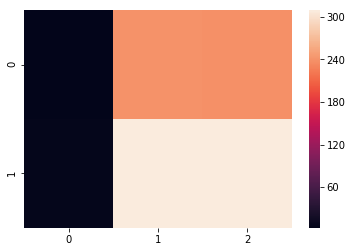

In [12]:
sns.heatmap(df)